<a href="https://colab.research.google.com/github/amargauge26/Design-of-Smart-Cities_project/blob/main/d_of_smart_city_water_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
data= pd.read_csv("/content/drive/MyDrive/SAMPLE_DATASETS/DATASET - Sheet1.csv")

In [3]:
X = data.drop('WATER REQUIREMENT', axis=1)
y = data['WATER REQUIREMENT']


In [4]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['CROP TYPE', 'SOIL TYPE', 'REGION', 'TEMPERATURE', 'WEATHER CONDITION']),
    ], remainder='passthrough'
)

In [5]:
# Create a pipeline with preprocessing and model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['CROP TYPE', 'SOIL TYPE',
                                                   'REGION', 'TEMPERATURE',
                                                   'WEATHER CONDITION'])])),
                ('regressor', RandomForestRegressor())])

In [8]:
y_pred = model.predict(X_test)

In [9]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)

Mean Squared Error: 51.35781781634218
Mean Absolute Error: 1.079807161458333
R-squared Score: -2.205029500040846


In [15]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [10]:

def categorize_water_requirement(value):
    if value < 5:
        return "Low"
    elif 5 <= value < 10:
        return "Medium"
    else:
        return "High"

In [12]:
y_train_categorized = y_train.apply(categorize_water_requirement)
y_test_categorized = y_test.apply(categorize_water_requirement)
y_pred_categorized = pd.Series([categorize_water_requirement(pred) for pred in y_pred])

In [16]:
print("\nClassification Report:")
print(classification_report(y_test_categorized, y_pred_categorized))



Classification Report:
              precision    recall  f1-score   support

        High       0.81      0.83      0.82        66
         Low       0.92      0.96      0.94       227
      Medium       0.93      0.89      0.91       283

    accuracy                           0.91       576
   macro avg       0.89      0.89      0.89       576
weighted avg       0.91      0.91      0.91       576



In [17]:
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test_categorized, y_pred_categorized, labels=["Low", "Medium", "High"])
print(conf_matrix)


Confusion Matrix:
[[218   8   1]
 [ 19 252  12]
 [  0  11  55]]


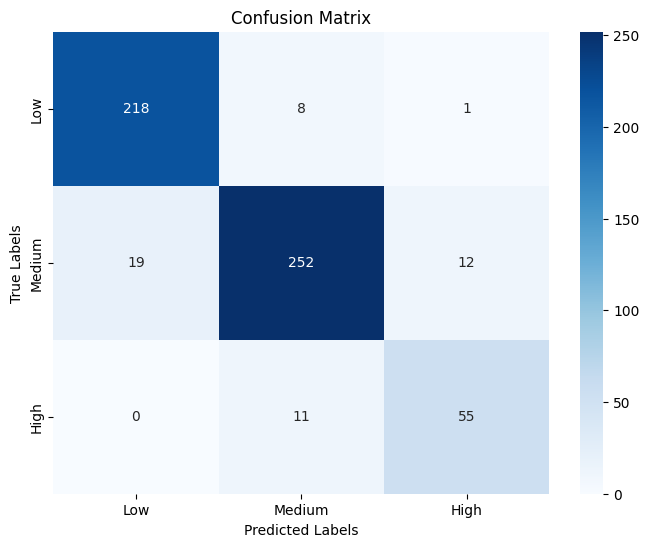

In [18]:
# Visualize the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Low", "Medium", "High"], yticklabels=["Low", "Medium", "High"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

<ipython-input-19-14d0f4adec42>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_categorized, palette="viridis")


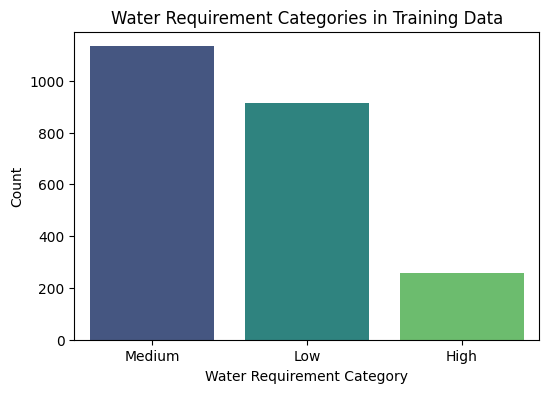

In [19]:
# Plot count of each water requirement category in y_train_categorized
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train_categorized, palette="viridis")
plt.title("Water Requirement Categories in Training Data")
plt.xlabel("Water Requirement Category")
plt.ylabel("Count")
plt.show()


<ipython-input-20-1b4b0cbb78d5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="CROP TYPE", palette="rocket")


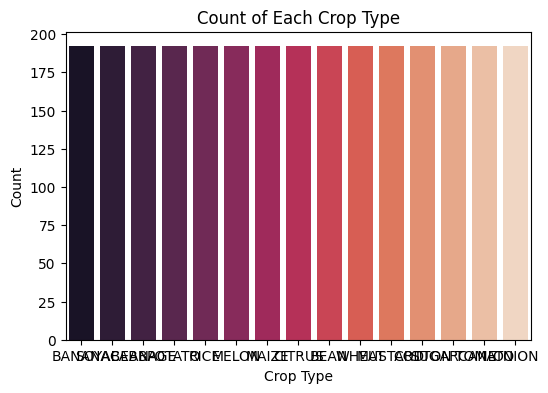

In [20]:
# Plot count of each crop type
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x="CROP TYPE", palette="rocket")
plt.title("Count of Each Crop Type")
plt.xlabel("Crop Type")
plt.ylabel("Count")
plt.show()

<ipython-input-21-c9d05f579a27>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_water_by_temp, x="TEMPERATURE", y="WATER REQUIREMENT", palette="magma")


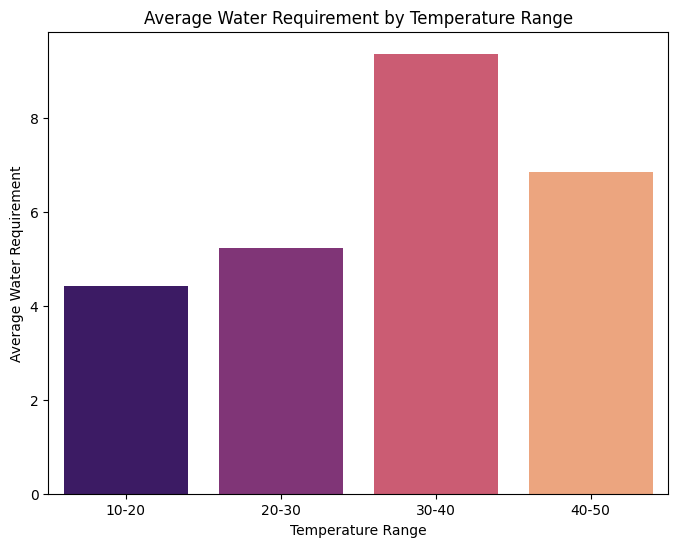

In [21]:
# Bar plot for average water requirement by temperature range
plt.figure(figsize=(8, 6))
avg_water_by_temp = data.groupby("TEMPERATURE")["WATER REQUIREMENT"].mean().reset_index()
sns.barplot(data=avg_water_by_temp, x="TEMPERATURE", y="WATER REQUIREMENT", palette="magma")
plt.title("Average Water Requirement by Temperature Range")
plt.xlabel("Temperature Range")
plt.ylabel("Average Water Requirement")
plt.show()

<ipython-input-22-a5a502d918ea>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_water_by_weather, x="WEATHER CONDITION", y="WATER REQUIREMENT", palette="coolwarm")


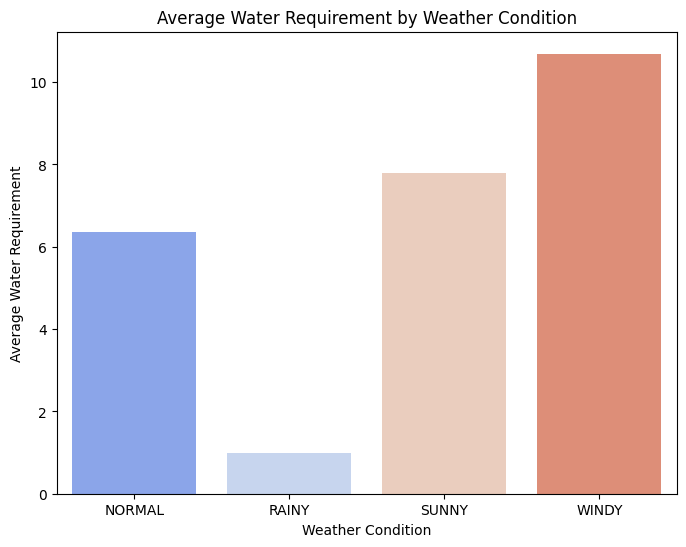

In [22]:
# Bar plot for average water requirement by weather condition
plt.figure(figsize=(8, 6))
avg_water_by_weather = data.groupby("WEATHER CONDITION")["WATER REQUIREMENT"].mean().reset_index()
sns.barplot(data=avg_water_by_weather, x="WEATHER CONDITION", y="WATER REQUIREMENT", palette="coolwarm")
plt.title("Average Water Requirement by Weather Condition")
plt.xlabel("Weather Condition")
plt.ylabel("Average Water Requirement")
plt.show()